# **MAI712** - Fundamentos em Ciência de Dados
___
#### **Professores:** Sergio Serra e Jorge Zavaleta
___
#### **Equipe:** Ingrid Pacheco, Eduardo Prata
___
### **OBJETIVO:**
Script de criação de um dataset com os artigos publicados em alguns eventos para o projeto final da matéria MAI712

#### **Requisito:**
É necessário que tenhamos instalado o Beautiful Soup, antes mesmo de iniciarmos nosso _** de Web Scraping**_ para construção do nosso _DataSet_ de artigos.

#### **Imports e Bibliotecas**

Aqui estaremos declarando as bibliotecas e módulos necessários para nosso script:

* [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)
* [prov](https://pypi.org/project/prov/)
* [semanticScholar - versão 0.3.0](https://pypi.org/project/semanticscholar/)
* [requests](https://pypi.org/project/requests/)
* [IPython](https://ipython.org/install.html)

In [3]:
# Importar módulo de Requests e de Expressões Regulares
!pip install requests
import requests, random

# Import do beautifulSoup para tratamento dos dados retornados da pagina Web
!pip install beautifulsoup4
from bs4 import BeautifulSoup
import csv
import time

!pip install semanticscholar==0.3.0
from semanticscholar import SemanticScholar
sch = SemanticScholar(timeout=8)

import datetime
!pip install prov
from prov.model import ProvDocument
from prov.dot import prov_to_dot

!pip install ipython
from IPython.display import Image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 421 kB 5.4 MB/s 
     |████████████████████████████████| 500 kB 35.0 MB/s 
     |████████████████████████████████| 41 kB 478 kB/s 


In [4]:
def get_properties(retorno):
  keys = retorno.keys()

  if 'paperId' in keys:
    paperId = retorno['paperId']
  else:
    paperId = ''
  
  if 'externalIds' in keys and 'DOI' in retorno['externalIds'].keys():
    doi = retorno['externalIds']['DOI']
  else:
    doi = ''

  if 'authors' in keys:
    authors_list = retorno['authors']
  else:
    authors_list = []

  if 'venue' in keys:
    publisher = retorno['venue']
  else:
    publisher = ''
  
  if 'topics' in keys:
    topics_list = retorno['topics']
  else:
    topics_list = []

  if 'fieldsOfStudy' in keys:
    fields_of_study_list = retorno['fieldsOfStudy']
  else:
    fields_of_study_list = []

  authors = ''
  for author in authors_list: authors = authors + author['name'] + ','
  authors = authors[0:len(authors)-1]

  topics = ''
  for topic in topics_list:
    topic = topic if type(topic) is not dict else topic['topic']
    topics = topics + topic + ','
  topics = topics[0:len(topics)-1]

  fields_of_study = ''
  if fields_of_study_list is not None:
    for field in fields_of_study_list: fields_of_study = fields_of_study + field + ','
    fields_of_study = fields_of_study[0:len(fields_of_study)-1]

  article_data = [paperId,doi,authors,publisher,topics,fields_of_study]

  return article_data

In [27]:
def find_article(qty_article, title):
  print('Não tem DOI')
  if qty_article % 99 == 0 and qty_article != 0:
    print("Atingiu +99")
    time.sleep(300)
  articles = sch.search_paper(title)
  if len(articles) > 0:
    print(articles[0])
    article_data = get_properties(articles[0])
    return article_data
  return None

In [6]:
find_article("Basil: Breaking up BFT with ACID (transactions).")

Não tem DOI
{'paperId': 'e3b8493001da3d4bbd0c836252d669db25d2b752', 'externalIds': {'ArXiv': '2109.12443', 'DBLP': 'journals/corr/abs-2109-12443', 'DOI': '10.1145/3477132.3483552', 'CorpusId': 237940920}, 'url': 'https://www.semanticscholar.org/paper/e3b8493001da3d4bbd0c836252d669db25d2b752', 'title': 'Basil: Breaking up BFT with ACID (transactions)', 'abstract': "This paper presents Basil, the first transactional, leaderless Byzantine Fault Tolerant key-value store. Basil leverages ACID transactions to scalably implement the abstraction of a trusted shared log in the presence of Byzantine actors. Unlike traditional BFT approaches, Basil executes non-conflicting operations in parallel and commits transactions in a single round-trip during fault-free executions. Basil improves throughput over traditional BFT systems by four to five times, and is only four times slower than TAPIR, a non-Byzantine replicated system. Basil's novel recovery mechanism further minimizes the impact of failures

['e3b8493001da3d4bbd0c836252d669db25d2b752',
 '10.1145/3477132.3483552',
 'Florian Suri-Payer,Matthew Burke,Zheng Wang,Yunhao Zhang,L. Alvisi,Natacha Crooks',
 'SOSP',
 '',
 'Computer Science']

In [7]:
def get_complementary_data(qty_article, search_id):

  if qty_article % 99 == 0 and qty_article != 0:
    print("Atingiu +99")
    time.sleep(300)
  retorno = sch.get_paper(search_id)

  while retorno is None:
    print("Deu erro")
    time.sleep(300)
    retorno = sch.get_paper(search_id)
  
  article_data = get_properties(retorno)

  return article_data

In [8]:
get_complementary_data(1,'e3b8493001da3d4bbd0c836252d669db25d2b752')

['e3b8493001da3d4bbd0c836252d669db25d2b752',
 '10.1145/3477132.3483552',
 'Florian Suri-Payer,Matthew Burke,Zheng Wang,Yunhao Zhang,L. Alvisi,Natacha Crooks',
 'SOSP',
 '',
 'Computer Science']

In [9]:
def get_doi_data(doi_url,cabecalho):
    resposta = requests.get(doi_url, headers = cabecalho)
    sopa = BeautifulSoup(resposta.text, 'html.parser')
    authors = ''
    keywords = ''
    # print(sopa.prettify())
    author_list = sopa.find('ul',{'ariaa-label':'authors'})
    if author_list is not None:
        for author in author_list.find_all('a',{'class':'author-name'}):
            authors = authors + author.get('title') + ','
        authors = authors[0:len(authors)-1]
    print(authors)

    kw_list = sopa.find('ol',{'class':'rlist organizational-chart'})
    if kw_list is not None:
        for kw in kw_list.find_all('a'):
            keywords = keywords + kw.get_text() + ','
        keywords = keywords[0:len(keywords)-1]
    print(keywords)

    return authors,keywords

In [32]:
def main(nome_arquivo,d1,dagnts,dentities,dactivities):
  """#### **Primeiro Etapa:** Declaração das variáveis necessárias para nosso WebScraping
  """

  # Pegando aleatoriedade de browser para não ser identificado o Robo.
  UAS = ("Mozilla/5.0 (Windows NT 6.1; WOW64; rv:40.0) Gecko/20100101 Firefox/40.1", 
        "Mozilla/5.0 (Windows NT 6.3; rv:36.0) Gecko/20100101 Firefox/36.0",
        "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10; rv:33.0) Gecko/20100101 Firefox/33.0",
        "Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2228.0 Safari/537.36",
        "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2227.1 Safari/537.36",
        "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2227.0 Safari/537.36",
        )

  ua = UAS[random.randrange(len(UAS))]

  # Variáveis do sistema
  cabecalho = {'user-agent': ua}
  header = ['title', 'paperId', 'doi', 'authors', 'publisher', 'topics', 'fields_of_study','year']
  qty_article = 0
  conferences = ["SOSP - ACM Symposium on Operating Systems Principles",
  "OSDI - Operating Systems Design and Implementation"]
  # "NDSS - Network and Distributed System Security Symposium",
  # "MobiHoc - Mobile Ad Hoc Networking and Computing",
  # "SIGCOMM - ACM SIGCOMM Conference",
  # "SenSys - Conference On Embedded Networked Sensor Systems",
  # "MOBICOM - Mobile Computing and Networking",
  # "CIDR - Conference on Innovative Data Systems Research",
  # "USENIX Security Symposium",
  # "EUROCRYPT - Theory and Application of Cryptographic Techniques"]

  """#### **Segunda Etapa:** Request no alvo e `html.parser` e filtra penas _tags_ analisadas como importantes
  """

  with open(nome_arquivo,'w',newline='',encoding="utf-8") as f:

    # create the csv writer
    writer = csv.writer(f,delimiter=";")

    # write header to csv file
    writer.writerow(header)

  # Busca o HTML a ser explorado
    for conf in conferences:
      conf = conf.split('-')[0]
      print('Conf: ' + conf)
      conf_parts = conf.split(' ')
      if conf_parts[len(conf_parts) - 1] == '':
        conf_parts = conf_parts[:-1]
      conf_string = '-'.join(conf_parts)
      print(conf_string)
      search_conf = "search?q=" + conf
      alvo = "https://dblp.org/" + search_conf
      dentities[f'et-lista-conferencias-{conf_string}'] = d1.entity(f'dblp:lista-{conf_string}', {'prov:label': f'Lista das conferências que fazem match com dblp:{search_conf}', 'prov:type': 'foaf:Document'})
      dactivities[f'et-busca-{conf_string}'] = d1.activity(f'dblp:{search_conf}')
      d1.used(dactivities[f'et-busca-{conf_string}'], dentities['et-top10'])
      d1.wasGeneratedBy(dentities[f'et-lista-conferencias-{conf_string}'], dactivities[f'et-busca-{conf_string}'])
      d1.wasAssociatedWith(dactivities[f'et-busca-{conf_string}'], dagnts["ag-gad-ipynb"])

      resposta = requests.get(alvo, headers = cabecalho)

      # Formatando o retorno
      sopa = BeautifulSoup(resposta.text, 'html.parser')

      infos = sopa.find('div', {'id':'completesearch-venues'})
      
      venue = infos.find('ul', {'class':'result-list'}).find('a')

      print('Href: ' + venue.get('href'))
      venue_href = venue.get('href')
      venue_href_sufix = venue_href.split('https://dblp.org/')[1]
      resposta = requests.get(venue_href, headers = cabecalho)
      sopa = BeautifulSoup(resposta.text, 'html.parser')

      dentities[f'et-lista-edicoes-{conf_string}'] = d1.entity(f'dblp:lista-edicoes-{conf_string}', {'prov:label': f'Lista das edições da conferência {conf}', 'prov:type': 'foaf:Document'})
      dactivities[f'et-edicoes-{conf_string}'] = d1.activity(f'dblp:{venue_href_sufix}')
      d1.used(dactivities[f'et-edicoes-{conf_string}'], dentities[f'et-lista-conferencias-{conf_string}'])
      d1.wasGeneratedBy(dentities[f'et-lista-edicoes-{conf_string}'], dactivities[f'et-edicoes-{conf_string}'])
      d1.wasAssociatedWith(dactivities[f'et-edicoes-{conf_string}'], dagnts["ag-gad-ipynb"])

      for conf_edition in sopa.find_all('ul', {'class':'publ-list'}):
        conf_title = conf_edition.find('span',{'itemprop':'name'}).get_text().lower()

        # Desconsidera os workshops
        if 'workshop' in conf_title:
          continue

        published_year = conf_edition.find('span',{'itemprop':'datePublished'}).get_text()
        print('Ano: ' + published_year)

        # So pega os artigos ate 2018
        if int(published_year) < 2018:
          break
        content = conf_edition.find('a',{'class':'toc-link'}).get('href')
        content_sufix = content.split('https://dblp.org/')[1]
        print(content)

        dentities[f'et-lista-artigos-{conf_string}-{published_year}'] = d1.entity(f'dblp:lista-artigos-{conf_string}-{published_year}', {'prov:label': f'Lista das artigos publicados na conferência {conf} no ano de {published_year}', 'prov:type': 'foaf:Document'})
        dactivities[f'et-artigos-{conf_string}-{published_year}'] = d1.activity(f'dblp:{content_sufix}')
        d1.used(dactivities[f'et-artigos-{conf_string}-{published_year}'], dentities[f'et-lista-edicoes-{conf_string}'])
        d1.wasGeneratedBy(dentities[f'et-lista-artigos-{conf_string}-{published_year}'], dactivities[f'et-artigos-{conf_string}-{published_year}'])
        d1.wasAssociatedWith(dactivities[f'et-artigos-{conf_string}-{published_year}'], dagnts["ag-gad-ipynb"])

        d1.wasDerivedFrom(dentities['et-dataset'], dentities[f'et-lista-artigos-{conf_string}-{published_year}'])

        resposta = requests.get(content, headers = cabecalho)
        sopa = BeautifulSoup(resposta.text, 'html.parser')
        for article in sopa.find_all('li', {'class':'entry inproceedings'}):
          header = article.find_all_previous('h2')[0].get('id')
          
          # Desconsidera os keynotes
          if header is not None:
            header = header.lower()
            if 'keynote' in header:
              continue
          
          title = article.find('span', {'class':'title'}).get_text()
          print(title)
          year = article.find('meta', {'itemprop':'datePublished'})['content']
          print(year)
          genre = article.find('meta', {'property':'genre'})['content']
          print(genre)
          doi_url = article.find('li', {'class': 'drop-down'}).find('a').get('href')
          doi = ''
          article_data = []
          if 'https://doi.org/' not in doi_url:
            article_data = find_article(qty_article, title)
            if article_data is None or article_data[0] == '':
              print('paperId is None')
              authors = ''
              for author in article.find_all('span',{'itemprop':'author'}):
                authors = authors + author.find('span',{'itemprop':'name'}).get('title') + ','
              authors = authors[0:len(authors)-1]
              # [paperId,doi,authors,publisher,topics,fields_of_study]
              if article_data is None:
                article_data = ['','',authors,conf,'',genre]
              else:
                article_data = [article_data[0],article_data[1],authors,conf,article_data[4],genre]
            else:
              print('articledata1: ', article_data)
              paperId = article_data[0]
              # print('paperId: ' + article_data[0])
              # article_data = get_complementary_data(qty_article, paperId)
              doi = article_data[1]
              print('doi: ', doi)

          else:
            doi = doi_url.split('https://doi.org/')[1]
            print(doi)
            article_data = get_complementary_data(qty_article, doi)
            print('articledata2: ', article_data)

          authors = ''
          keywords = ''

          if doi != '':
            authors, keywords = get_doi_data(doi_url,cabecalho)
          
          if article_data is not None:
            article_data.insert(0,title)
            article_data.append(year)
            article_data[3] = authors if authors != '' else article_data[3]
            article_data[4] = conf
            if article_data[5] == '' and keywords != '':
              article_data[5] = keywords
            elif article_data[5] != '' and keywords != '':
              article_data[5] = article_data[5] + ', ' + keywords
            # [title,paperId,doi,authors,publisher,topics,fields_of_study,year]
            if article_data[6] == '':
              article_data[6] = genre
            elif genre.lower() not in article_data[6].lower():
              article_data[6] = article_data[6] + ', ' + genre
          else:
            article_data = [title,'',doi,authors,conf,keywords.lower(),genre.lower(),year]

          writer.writerow(article_data)
          qty_article += 1
          if qty_article == 10:
            break
  print('Quantidade: ' + str(qty_article))

In [1]:
def create_agents(d1,agents):
    agents["ag-ufrj"] = d1.agent("ufrj:UFRJ", {"prov:type":"prov:Organization", "foaf:name":"Universidade Federal do Rio de Janeiro"})
    agents["ag-ppgi"] = d1.agent("ufrj:PPGI", {"prov:type":"prov:Organization", "foaf:name":"Programa de Pós Graduação em Informática"})
    agents["ag-ppgi"].actedOnBehalfOf(agents["ag-ufrj"])
    agents["ag-mai712"] = d1.agent("ufrj:MAI712", {"prov:type":"prov:Organization", "foaf:name":"Disciplina de Fundamentos de Ciências de Dados"})
    agents["ag-mai712"].actedOnBehalfOf(agents["ag-ppgi"])
    agents["ag-grupo6"] = d1.agent("ufrj:GRUPO6", {"prov:type":"prov:Organization", "foaf:name":"Grupo 06 para o trabalho final"})
    agents["ag-grupo6"].actedOnBehalfOf(agents["ag-mai712"])
    agents["ag-aluno-ingrid"] = d1.agent("ufrj:Ingrid", {"prov:type":"foaf:Person", "foaf:name":"Ingrid Quintanilha Pacheco", "foaf:mbox":"ingrid.pacheco@dcc.ufrj.br"})
    agents["ag-aluno-ingrid"].actedOnBehalfOf(agents["ag-grupo6"])
    agents["ag-aluno-eduardo"] = d1.agent("ufrj:Eduardo", {"prov:type":"foaf:Person", "foaf:name":"Eduardo Prata", "foaf:mbox":"edu.prata@gmail.com"})
    agents["ag-aluno-eduardo"].actedOnBehalfOf(agents["ag-grupo6"])
    agents["ag-gad-ipynb"] = d1.agent("ufrj:getArticleData.ipynb", {"prov:type":"prov:SoftwareAgent", "foaf:name":"getArticleData.ipynb", "prov:label":"Notebook Python utilizado no trabalho"})
    agents["ag-gad-ipynb"].actedOnBehalfOf(agents["ag-grupo6"])


Conf: SOSP 
SOSP
Href: https://dblp.org/db/conf/sosp/
Ano: 2021
https://dblp.org/db/conf/sosp/sosp2021.html
Basil: Breaking up BFT with ACID (transactions).
2021
computer science
10.1145/3477132.3483552
articledata2:  ['e3b8493001da3d4bbd0c836252d669db25d2b752', '10.1145/3477132.3483552', 'Florian Suri-Payer,Matthew Burke,Zheng Wang,Yunhao Zhang,L. Alvisi,Natacha Crooks', 'SOSP', '', 'Computer Science']
Florian Suri-Payer,Matthew Burke,Zheng Wang,Yunhao Zhang,Lorenzo Alvisi,Natacha Crooks
Computer systems organization,Dependable and fault-tolerant systems and networks,Security and privacy,Database and storage security,Systems security,Distributed systems security
Bidl: A High-throughput, Low-latency Permissioned Blockchain Framework for Datacenter Networks.
2021
computer science
10.1145/3477132.3483574
articledata2:  ['18413899e0b51f05a020b6f106a774068ecd90b2', '10.1145/3477132.3483574', 'Ji Qi,Xusheng Chen,Yunpeng Jiang,Jianyu Jiang,Tianxiang Shen,Shixiong Zhao,Sen Wang,Gong Zhang,Li 

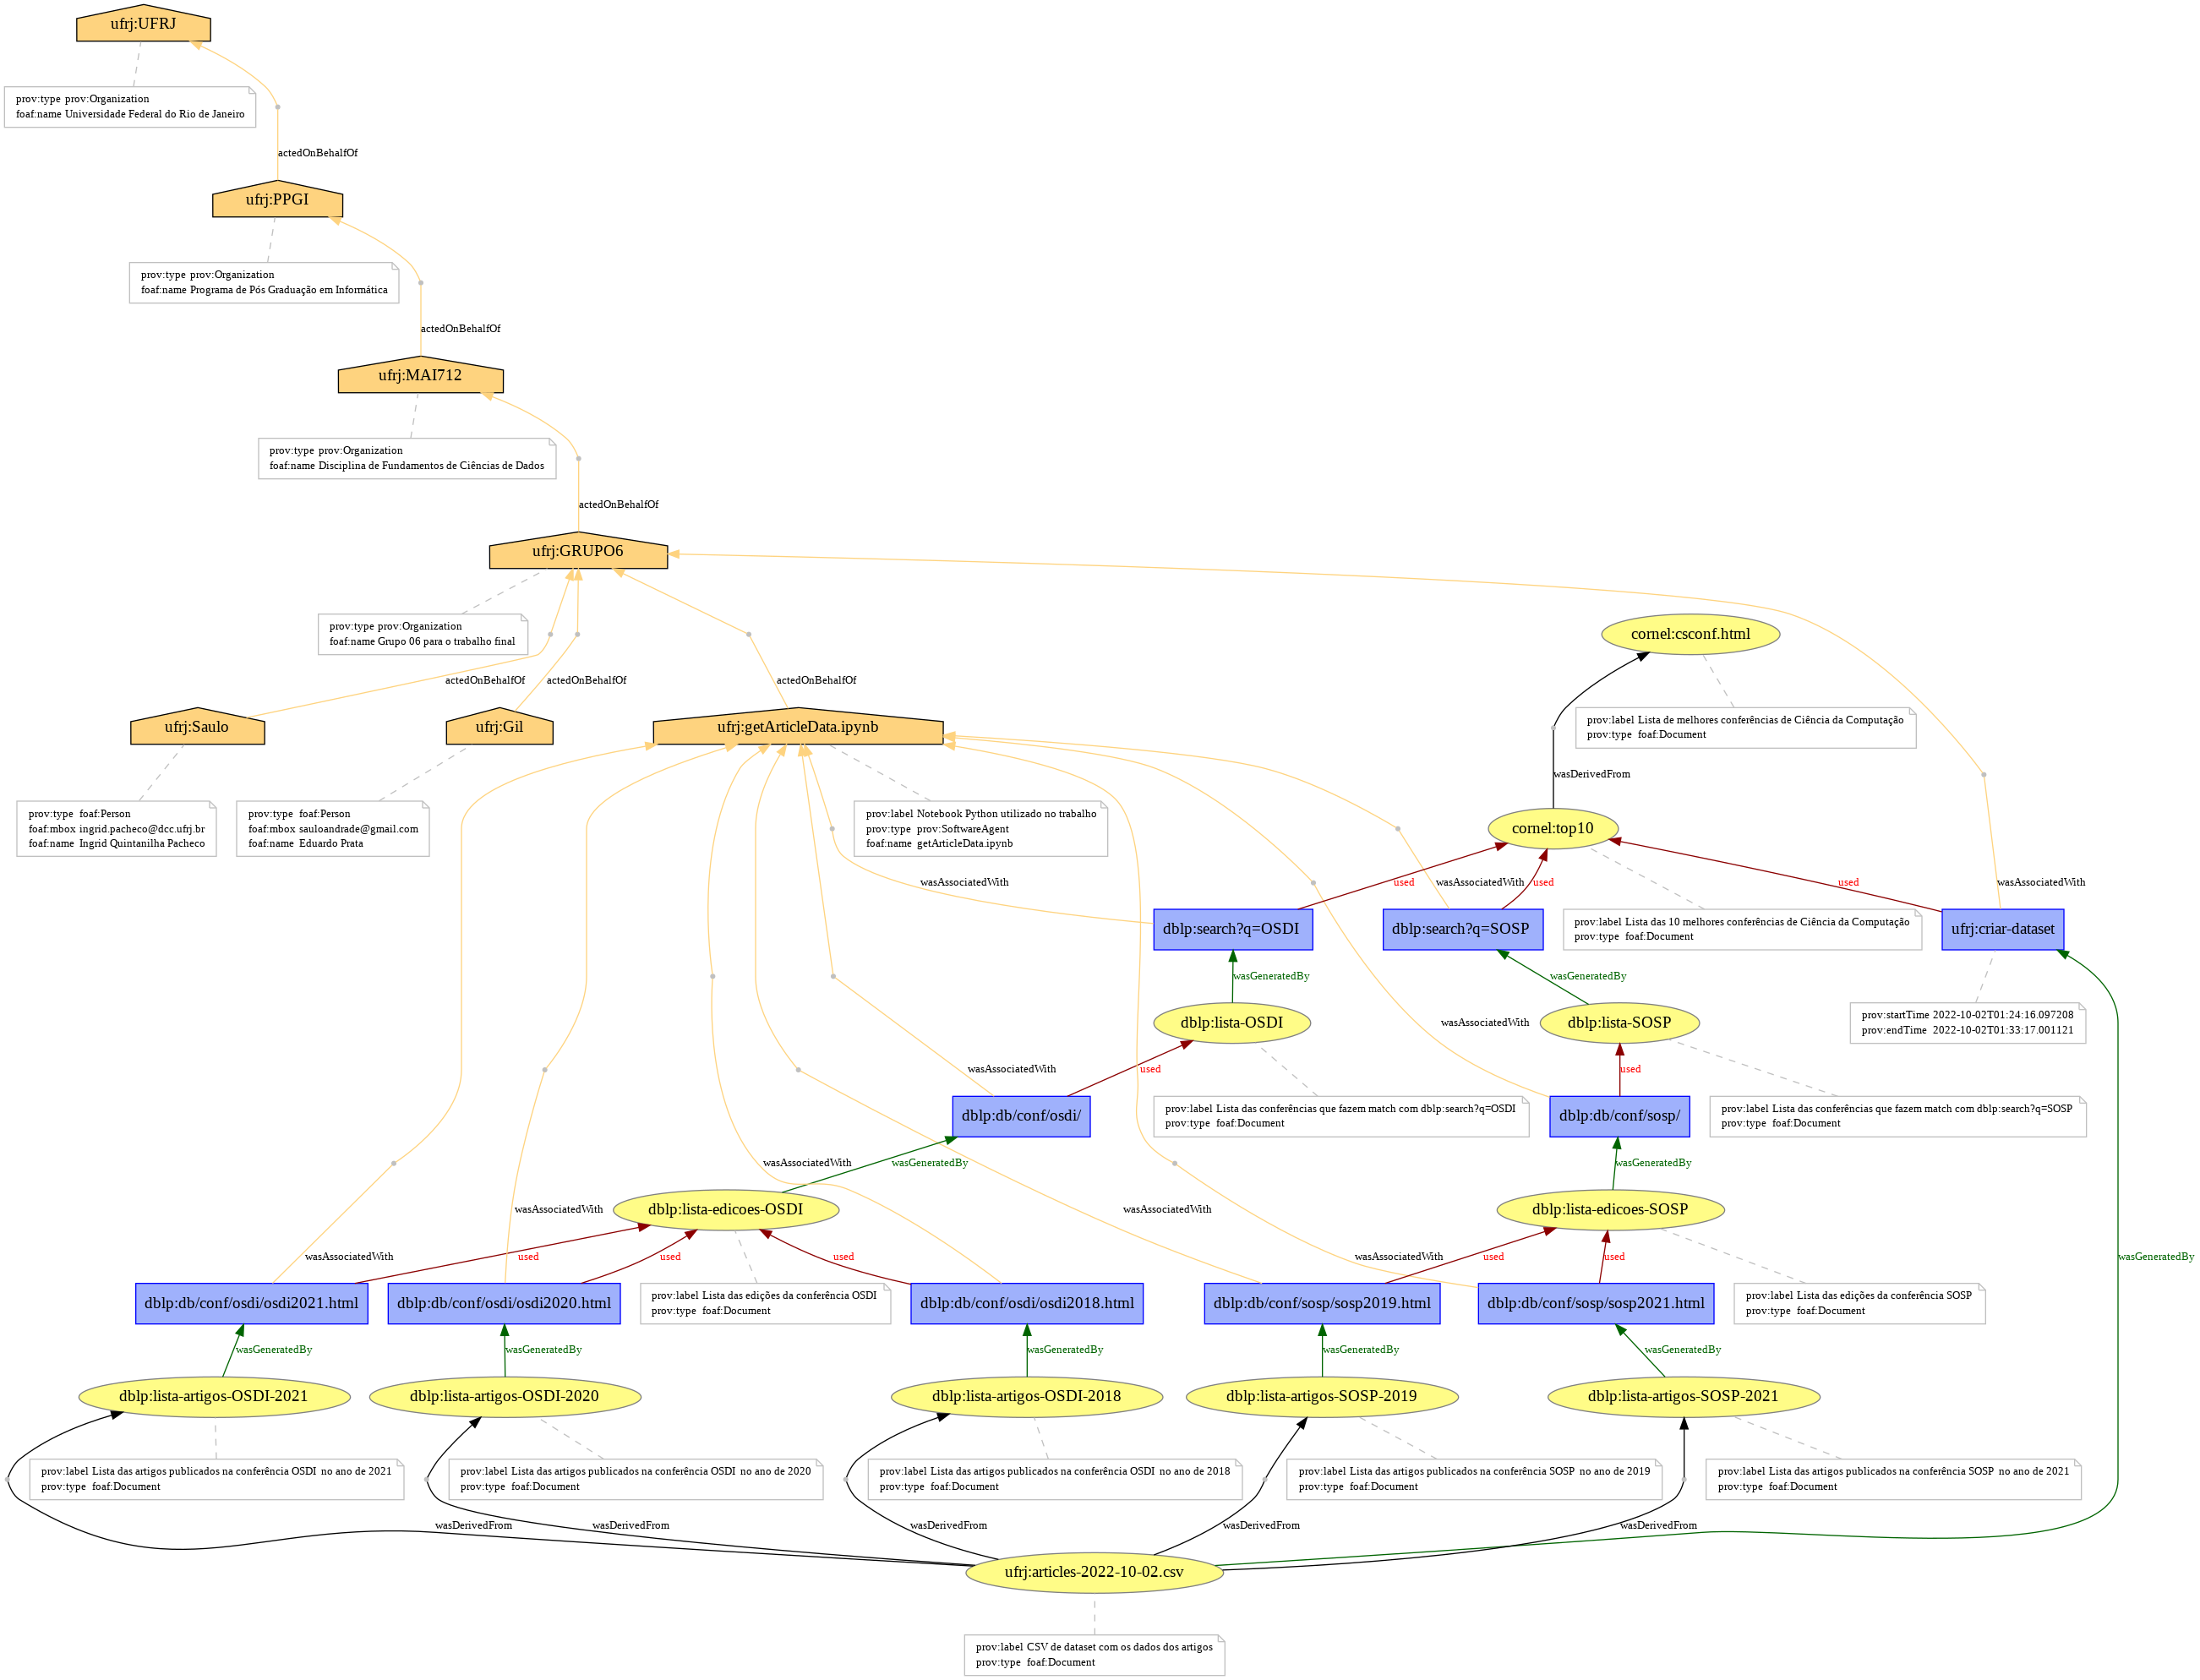

In [33]:
d1 = ProvDocument()
d1.add_namespace('cornel', 'https://www.cs.cornell.edu/andru/')
d1.add_namespace('dblp', 'https://dblp.org/')
d1.add_namespace('ufrj', 'https://www.ufrj.br')
d1.add_namespace('foaf', 'http://xmlns.com/foaf/0.1/')
dagnts = {}
dentities = {}
dactivities = {}
create_agents(d1,dagnts)
today = datetime.date.today()
nome_arquivo = 'articles-' + str(today) + '.csv'
dentities['et-conferencias'] = d1.entity('cornel:csconf.html', {'prov:label': 'Lista de melhores conferências de Ciência da Computação', 'prov:type': 'foaf:Document'})
dentities['et-top10'] = d1.entity('cornel:top10', {'prov:label': 'Lista das 10 melhores conferências de Ciência da Computação', 'prov:type': 'foaf:Document'})
dentities['et-dataset'] = d1.entity(f'ufrj:{nome_arquivo}', {'prov:label': 'CSV de dataset com os dados dos artigos', 'prov:type': 'foaf:Document'})
d1.wasDerivedFrom(dentities['et-top10'], dentities['et-conferencias'])
start_time = datetime.datetime.now()
main(nome_arquivo, d1, dagnts, dentities, dactivities)
end_time = datetime.datetime.now()
dactivities["at-criar-dataset"] = d1.activity("ufrj:criar-dataset", start_time, end_time)
d1.used(dactivities["at-criar-dataset"], dentities['et-top10'])
d1.wasGeneratedBy(dentities['et-dataset'], dactivities["at-criar-dataset"])
d1.wasAssociatedWith(dactivities["at-criar-dataset"], dagnts["ag-grupo6"])

print(d1.get_provn())
dot = prov_to_dot(d1)
dot.write_png('./getArticleData-prov.png')
Image('./getArticleData-prov.png')